# W.Y.N. Education: Tutorial for Automated Neural Network Classifier



## What is Neural Network?

Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems inspired by the biological neural networks that constitute animal brains.

An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron receives a signal then processes it and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.



## Neural Network Architecture?

![image](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)



### Artificial neurons

ANNs are composed of artificial neurons which are conceptually derived from biological neurons. Each artificial neuron has inputs and produces a single output which can be sent to multiple other neurons.The inputs can be the feature values of a sample of external data, such as images or documents, or they can be the outputs of other neurons. The outputs of the final output neurons of the neural net accomplish the task, such as recognizing an object in an image.

To find the output of the neuron, First we must take the weighted sum of all the inputs, weighted by the weights of the connections from the inputs to the neuron. We add a bias term to this sum. This weighted sum is sometimes called the activation. This weighted sum is then passed through a (usually nonlinear) activation function to produce the output. The initial inputs are external data, such as images and documents. The ultimate outputs accomplish the task, such as recognizing an object in an image.



### Organization

The neurons are typically organized into multiple layers, especially in deep learning. Neurons of one layer connect only to neurons of the immediately preceding and immediately following layers. The layer that receives external data is the input layer. The layer that produces the ultimate result is the output layer. In between them are zero or more hidden layers. Single layer and unlayered networks are also used. Between two layers, multiple connection patterns are possible. They can be 'fully connected', with every neuron in one layer connecting to every neuron in the next layer. They can be pooling, where a group of neurons in one layer connect to a single neuron in the next layer, thereby reducing the number of neurons in that layer. Neurons with only such connections form a directed acyclic graph and are known as feedforward networks. Alternatively, networks that allow connections between neurons in the same or previous layers are known as recurrent networks.



### Learning

Learning is the adaptation of the network to better handle a task by considering sample observations. Learning involves adjusting the weights (and optional thresholds) of the network to improve the accuracy of the result. This is done by minimizing the observed errors. Learning is complete when examining additional observations does not usefully reduce the error rate. Even after learning, the error rate typically does not reach 0. If after learning, the error rate is too high, the network typically must be redesigned. Practically this is done by defining a cost function that is evaluated periodically during learning. As long as its output continues to decline, learning continues. The cost is frequently defined as a statistic whose value can only be approximated. The outputs are actually numbers, so when the error is low, the difference between the output (almost certainly a cat) and the correct answer (cat) is small. Learning attempts to reduce the total of the differences across the observations. Most learning models can be viewed as a straightforward application of optimization theory and statistical estimation.



### Supervised learning

Supervised learning uses a set of paired inputs and desired outputs. The learning task is to produce the desired output for each input. In this case the cost function is related to eliminating incorrect deductions. A commonly used cost is the mean-squared error, which tries to minimize the average squared error between the network's output and the desired output. Tasks suited for supervised learning are pattern recognition (also known as classification) and regression (also known as function approximation). Supervised learning is also applicable to sequential data (e.g., for hand writing, speech and gesture recognition). This can be thought of as learning with a "teacher", in the form of a function that provides continuous feedback on the quality of solutions obtained thus far.



## Classification vs Regression

Classification predictive modeling problems are different from regression predictive modeling problems.

Classification is the task of predicting a discrete class label.
Regression is the task of predicting a continuous quantity.

This notebook focuses on classification problems so the tutorial walks readers through a classifier machine.

## Software

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

TensorFlow was developed by the Google Brain team for internal Google use in research and production. The initial version was released under the Apache License 2.0 in 2015. Google released the updated version of TensorFlow, named TensorFlow 2.0, in September 2019.

The production code in this software is developed and automated using Tensorflow and Keras.

In [11]:
!pip install git+https://github.com/yiqiao-yin/WYNAssociates.git # in jupyter notebook

  Cloning https://github.com/yiqiao-yin/WYNAssociates.git to /tmp/pip-req-build-spf0kwoy
  Running command git clone -q https://github.com/yiqiao-yin/WYNAssociates.git /tmp/pip-req-build-spf0kwoy


In [2]:
!pip install yfinance ta

     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 16.1 MB/s 
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=da35572b4388c0d1004740a5440aefe8e7ac972ebd76710a4f184c6b9fcaa405
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium=

## Library

In [12]:
# library
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## Load Data

In [14]:
# data
data = load_breast_cancer()

In [16]:
# train, validate, and test
X_train_full, X_test, y_train_full, y_test = train_test_split(data.data, data.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [17]:
# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # What is training set?
X_valid = scaler.transform(X_valid) # What is validating set?
X_test = scaler.transform(X_test) # What is test set?

In [18]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(319, 30)
(107, 30)
(143, 30)


## Load WYN Software

In [19]:
from AI_solution.modules import YinsDL

In [37]:
hidden = [2**i for i in range(10, 1, -1)][0]
hidden

1024

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 1024)              31744     
                                                                 
 dense_123 (Dense)           (None, 2)                 2050      
                                                                 
Total params: 33,794
Trainable params: 33,794
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
10/10 [==============================] - 1s 26ms/step - loss: 0.2579 - val_loss: 0.2576
Epoch 2/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2575 - val_loss: 0.2573
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2572 - val_loss: 0.2570
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 0.2569 - val_loss: 0.2568
Epoch 5/10
10/10 [============================

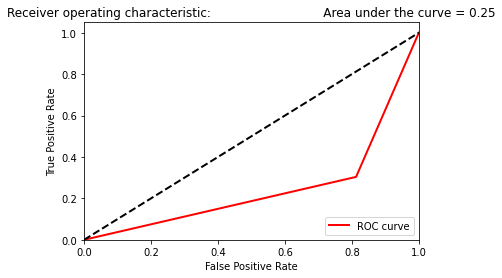

In [38]:
tmp = YinsDL.NeuralNet_Classifier(
        X_train=X_train,
        y_train=y_train, 
        X_valid=X_valid, 
        y_valid=y_valid, 
        X_test=X_test, 
        y_test=y_test,
        input_shape=[30],
        hidden=[hidden],
        output_shape=2,
        activation="relu",
        final_activation="softmax",
        learning_rate=0.001,
        loss="sparse_categorical_crossentropy",
        epochs=10,
        plotModelSummary=True,
        useGPU=False,
        verbose=True,
        plotROC=True
    )